In [10]:
import numpy as np
import sympy as sp

In [11]:
#set up anderson model
system_orbitals = 1 # odd-even represent spin up and down
spin_obitals = 1 # odd-even represent spin up and down    
modes = 2 # exponential decomposition
total_qubits = system_orbitals*2 + spin_obitals*modes*2 + 1
print(total_qubits)

7


In [12]:
from functools import reduce
from encode import JWT
H_op = JWT(1)
dicts = [H_op.num_op(0, 5)]
H = reduce(lambda x, y: {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}, dicts)
print(H)

{'I': 2.5, 'Z': -2.5}


In [13]:
# etal = np.loadtxt('etal1_1', dtype=complex)
etal = np.array([0.5+1j, 0.3-1j], dtype=complex)
etar = etal.conjugate()
eta = np.vstack((etal, etar))
gammal = np.array([1, 2], dtype=complex)
# gammal = np.loadtxt('expn1_1', dtype=complex)
gamma = np.vstack((gammal, gammal.conjugate()))
zetal = np.sqrt((etal + etar) / 2)
zeta = np.vstack((zetal, zetal.conjugate()))
print(eta)
print(gamma)
print(zeta)

[[0.5+1.j 0.3-1.j]
 [0.5-1.j 0.3+1.j]]
[[1.+0.j 2.+0.j]
 [1.-0.j 2.-0.j]]
[[0.70710678+0.j 0.54772256+0.j]
 [0.70710678-0.j 0.54772256-0.j]]


In [14]:
#evolution parameters
epsilon = 0.05
tau = 0.05

In [15]:
from qiskit.quantum_info import Statevector
initialstate = Statevector.from_label('0000'+'00'+'0')

In [16]:
from evolution2 import Evolution
DQME = Evolution(sys_qubits=system_orbitals, diss_qubits=spin_obitals,
                 modes=modes, H=H, gamma=gamma, eta=eta, zeta=zeta, 
                 epsilon=epsilon, tau=tau)
H_matrix = DQME.pauli_to_hermi(H, 1)
print(H_matrix)

[[0.+0.j 0.+0.j]
 [0.+0.j 5.+0.j]]


In [17]:
steps = 199
result = DQME.dynamics_run(initial=initialstate, steps=steps)

  0%|          | 0/199 [00:00<?, ?it/s]

100%|██████████| 199/199 [15:33<00:00,  4.69s/it]


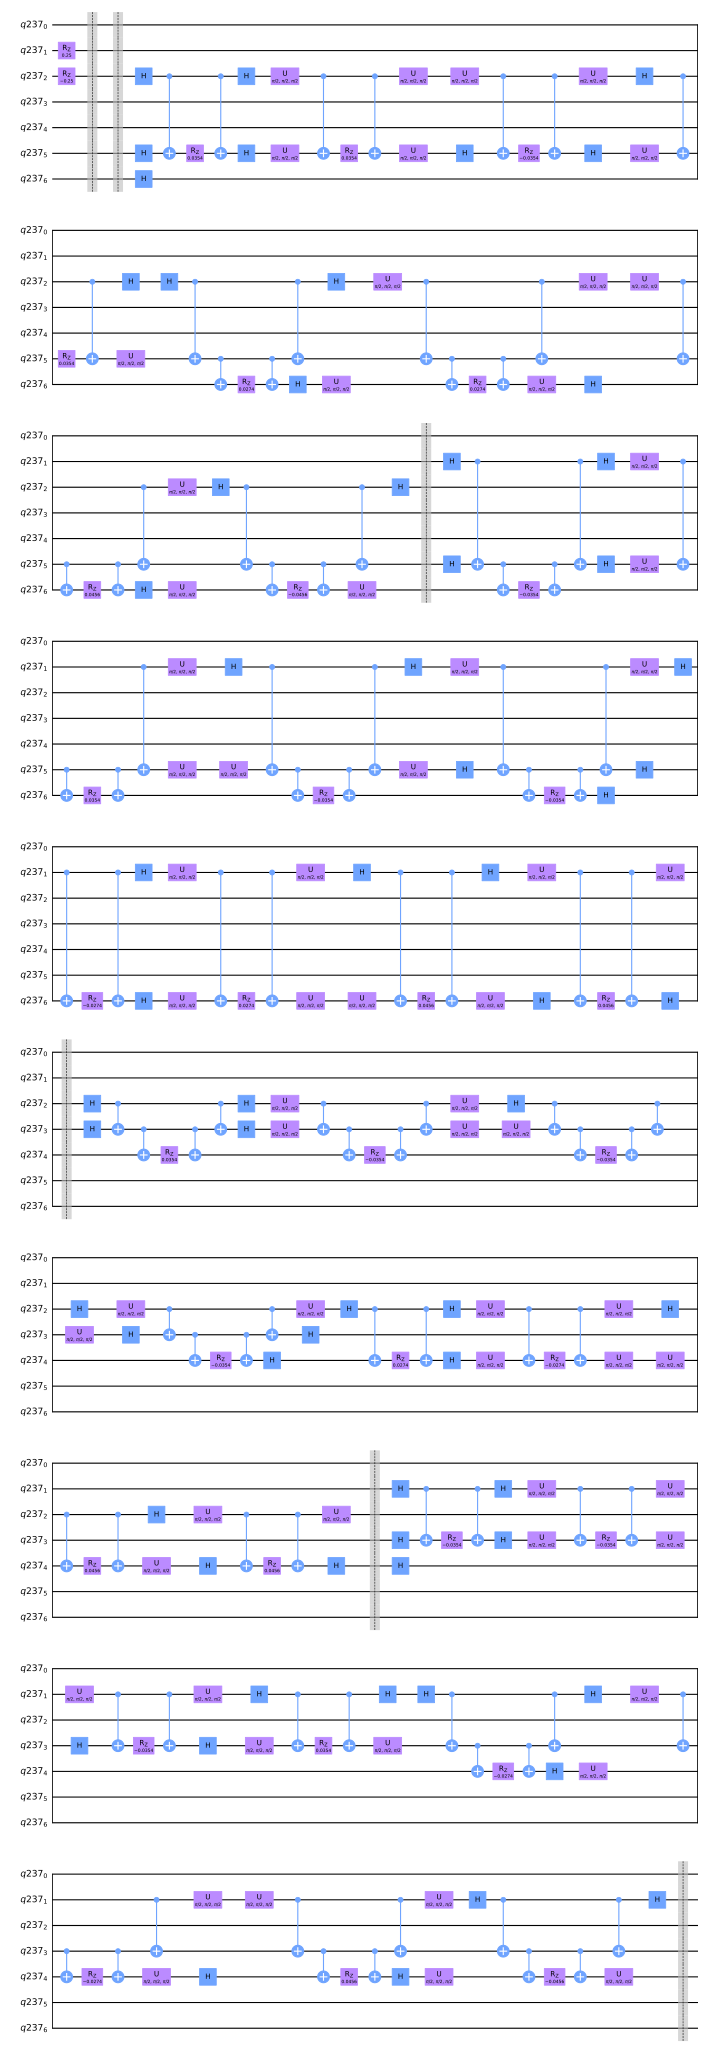

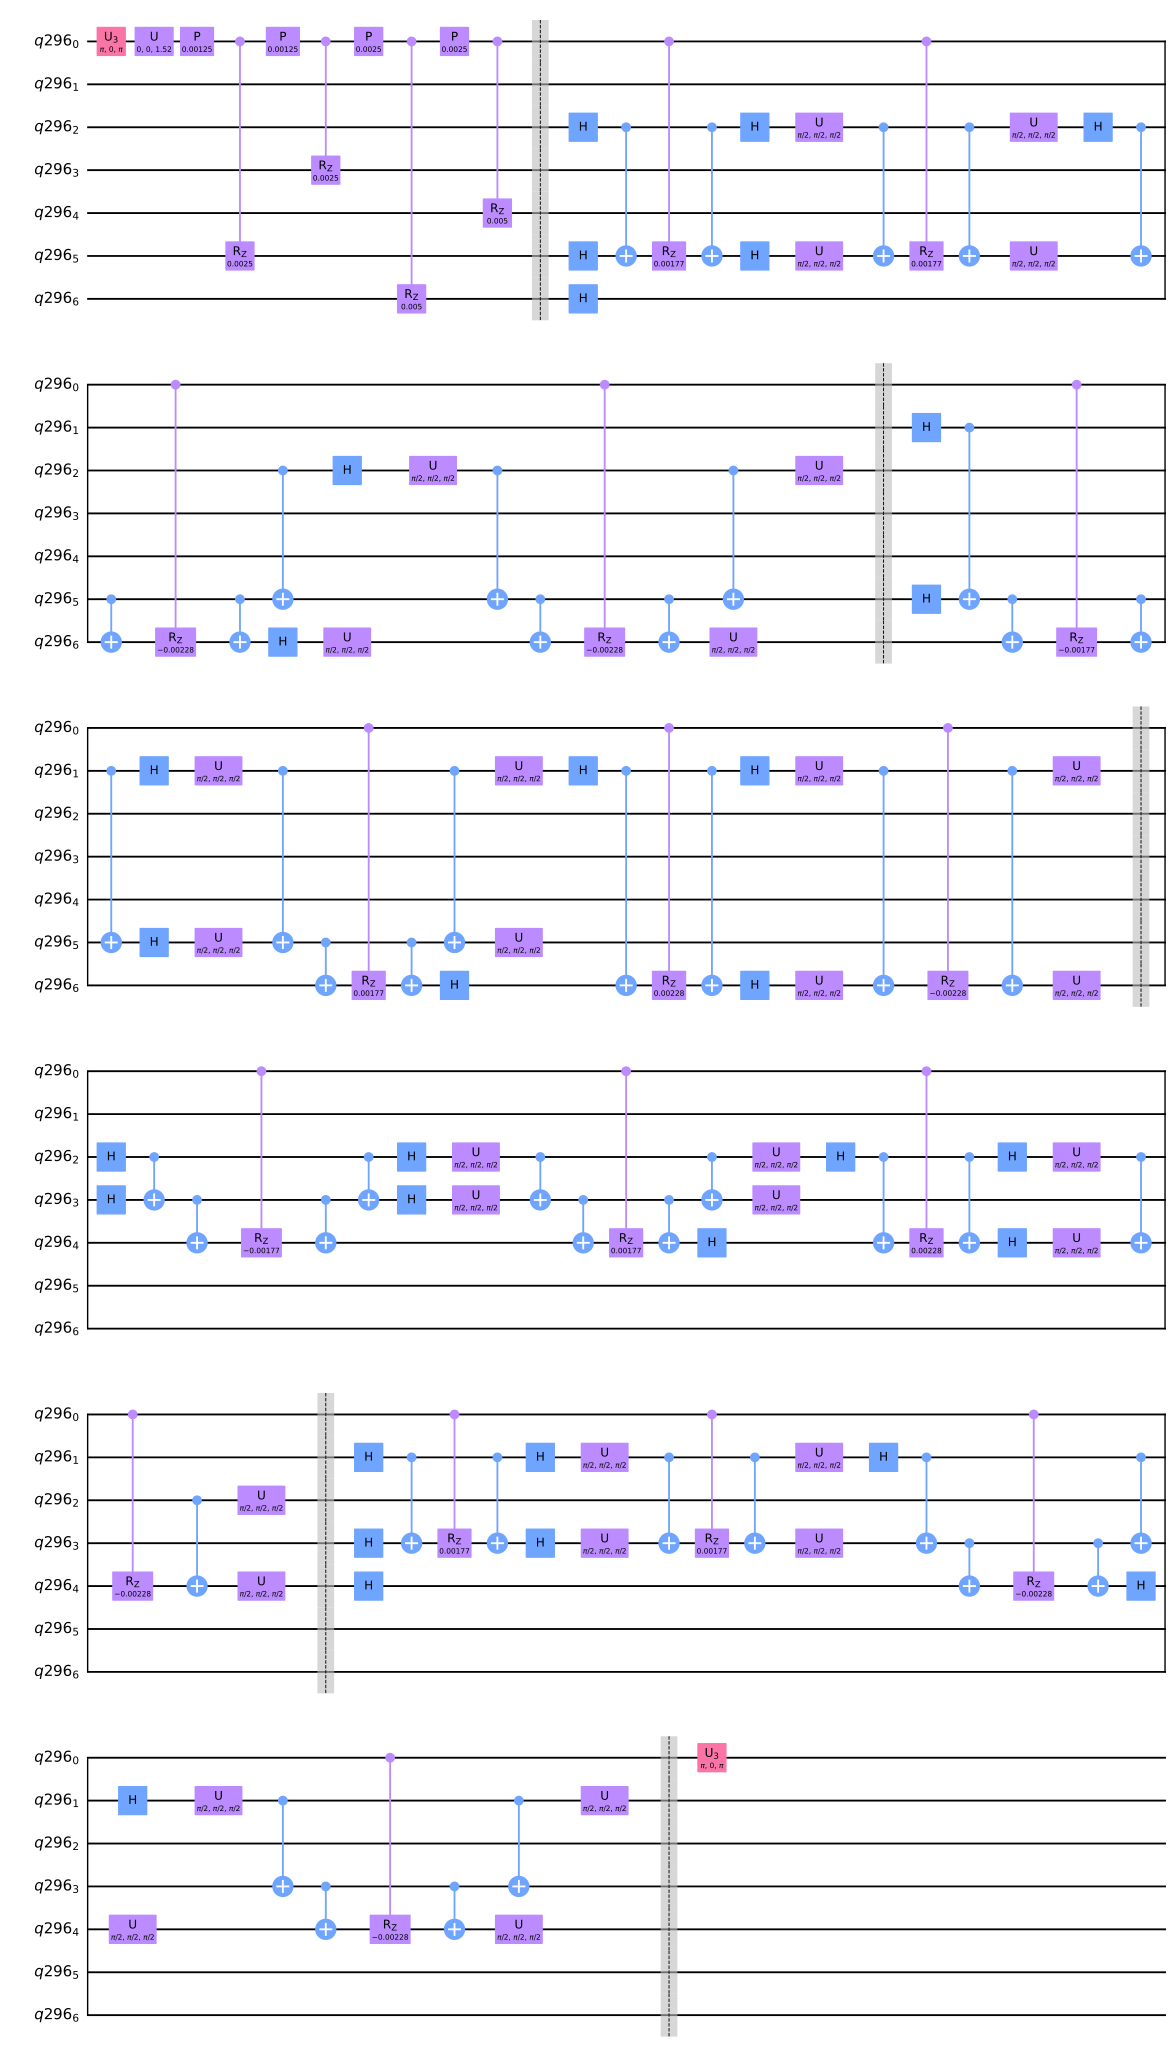

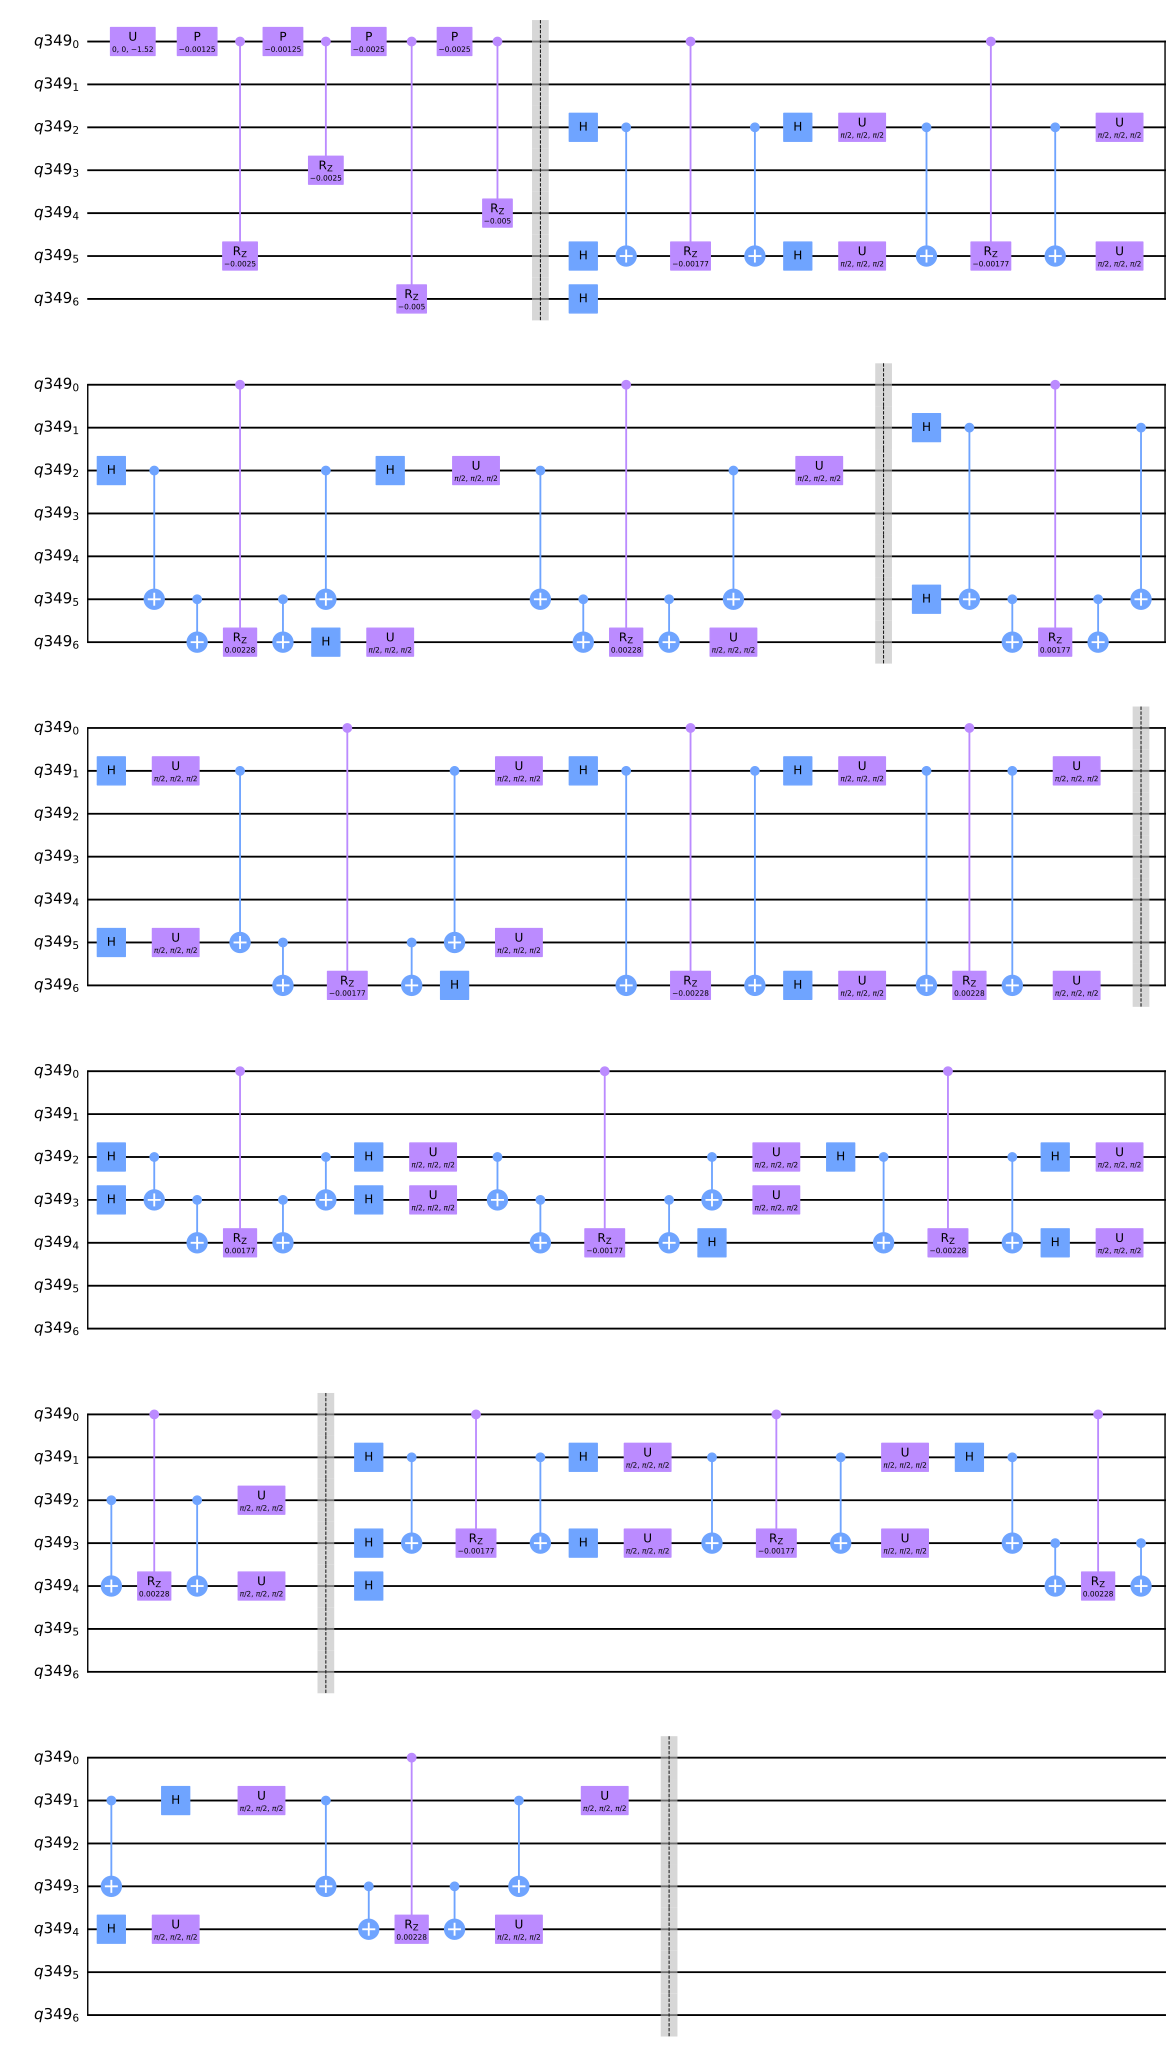

In [18]:
Ua_qc = DQME.UA_circuit.decompose()
Us_qc = DQME.US_circuit.decompose()
Ud_qc = DQME.USdagger_circuit.decompose()
display(Ua_qc.draw())
display(Us_qc.draw())
display(Ud_qc.draw())

In [19]:
from data import rdo_anderson, rho_tilde

rho_qubits = system_orbitals*2
rdo = []
for i in range(steps+1):
    statevector = rho_tilde(result[i], total_qubits)
    rdo.append(rdo_anderson(statevector, rho_qubits))

rdo_dict = {}
for i in range(steps+1):
    label = str(i)       
    rdo_dict[label] = rdo[i]
np.savez('rdo.npz', **rdo_dict)